This project is to understand which model would work for classification of whether a patient would have cancer or not. The dataset is impoted from https://www.kaggle.com/datasets/erdemtaha/cancer-data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df= pd.read_csv("Cancer_Data.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


the description of features
This dataset contains the characteristics of patients diagnosed with cancer. The dataset contains a unique ID for each patient, the type of cancer (diagnosis), the visual characteristics of the cancer and the average values of these characteristics.

📚 The main features of the dataset are as follows:
id: Represents a unique ID of each patient.
diagnosis: Indicates the type of cancer. This property can take the values "M" (Malignant - Benign) or "B" (Benign - Malignant).
radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean: Represents the mean values of the cancer's visual characteristics.
There are also several categorical features where patients in the dataset are labeled with numerical values. You can examine them in the Chart area.

Other features contain specific ranges of average values of the features of the cancer image:

radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean
Each of these features is mapped to a table containing the number of values in a given range. You can examine the Chart Tables

Each sample contains the patient's unique ID, the cancer diagnosis and the average values of the cancer's visual characteristics.

In [6]:
df.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.shape

(569, 33)

In [8]:
cat_target=["diagnosis"]

In [40]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [73]:
#cat_transformer= Pipeline(steps=[("onehot",OneHotEncoder(handle_unknown="ignore"))])

In [74]:
#preprocessor= ColumnTransformer(transformers=[("cat",cat_transformer,cat_target)])

In [10]:
model=Pipeline(steps=[("scaler",StandardScaler()),("model",LogisticRegression())])
model_2= Pipeline(steps=[("model_2",LogisticRegression(max_iter=100))])

In [11]:
X= df.drop(columns=["id","diagnosis","Unnamed: 32"],axis=1)

In [12]:
y=df["diagnosis"]
y=y.map({"M":1,"B":0}) # cancer = 1
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [13]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
X.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,stratify=y,test_size=0.2)

In [21]:
np.random.seed(41)
X_train.shape, y_train.shape
#clf1=LogisticRegression(max_iter=200)

#clf1.fit(X_test,y_test)
#clf1.score(X_test,y_test)

((455, 30), (455,))

In [41]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "SVR": svm.SVC(),
          "Random Forest": RandomForestClassifier()}

In [42]:
def fit_and_score(models, X_train, X_test, y_train, y_test):

    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [43]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/Users/anamikaroy/Desktop/practice/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9385964912280702,
 'SVR': 0.8859649122807017,
 'Random Forest': 0.9385964912280702}

In [28]:
#clf2=RandomForestRegressor()

#clf2.fit(X_train,y_train)
#clf2.score(X_test,y_test)

0.8908291666666666

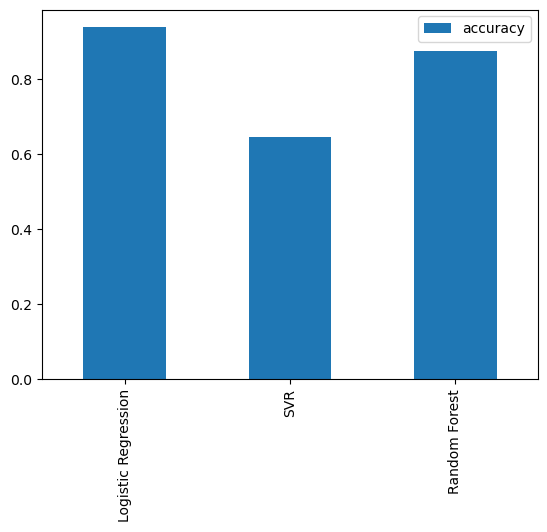

In [29]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [30]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [33]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [34]:
# Evaluate the randomized search Logistic Regression Model
rs_log_reg.score(X_test, y_test)

0.956140350877193

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(10000.0)}

In [45]:
# Evaluate the randomized search RandomForestClassifier model
np.random.seed(2)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [48]:
rs_rf.score(X_test,y_test)

0.9385964912280702

In [49]:
rs_rf.best_params_

{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(1),
 'max_depth': 5}

***More Evaluation Metrics***

In [59]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

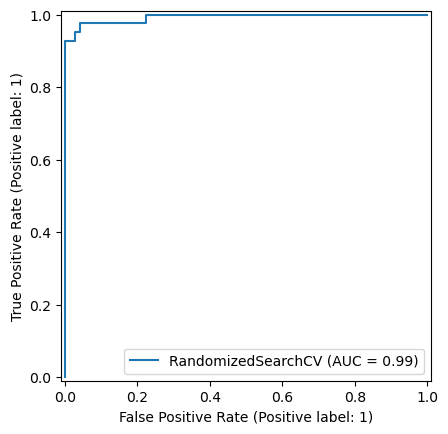

In [61]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(rs_log_reg, X_test, y_test)

In [62]:
y_preds= rs_log_reg.predict(X_test)

In [64]:
print(confusion_matrix(y_test,y_preds))

[[69  3]
 [ 2 40]]


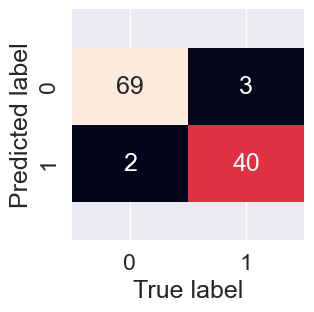

In [65]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn. metrics import f1_score

In [72]:
acc= r2_score(y_test,y_preds)
precision = precision_score(y_test, y_preds)
recall= recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

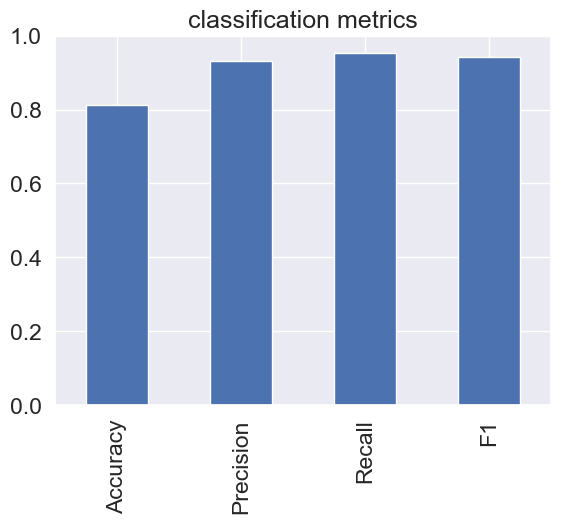

In [73]:
# Visualize evaluation metrics
eval_metrics = pd.DataFrame({"Accuracy": acc,
                           "Precision": precision,
                           "Recall": recall,
                           "F1": f1},
                          index=[0])

eval_metrics.T.plot.bar(title="classification metrics",
                      legend=False);

In [74]:
clf = LogisticRegression(solver="liblinear", C= np.float64(10000.0))

clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,np.float64(10000.0)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [86]:
clf.coef_

array([[-7.97391410e+00, -1.48104314e-01,  5.15393176e-01,
         3.75548743e-02,  3.64913629e+00,  8.92467183e-01,
         5.09609708e+00,  8.04428176e+00,  4.73367653e+00,
        -5.62740641e-01,  1.99586357e-01, -1.91308473e+00,
        -1.05950130e-01,  9.94804344e-02,  8.13744324e-01,
        -5.55345930e+00, -6.05670975e+00,  8.54369765e-01,
         2.47502781e-01, -1.10521665e+00,  1.34481097e+00,
         4.52861892e-01, -1.44461981e-02,  9.77493830e-03,
         7.86066925e+00, -4.34761221e+00,  2.92790793e+00,
         1.59694172e+01,  8.18651182e+00, -1.29992838e+00]])

In [89]:
 clf.coef_.shape

(1, 30)

In [90]:
X.shape

(569, 30)

In [84]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
# Match coef's of features to columns
feature_dict = dict(zip(X.columns, list(clf.coef_[0])))
feature_dict

{'radius_mean': np.float64(-7.973914098377074),
 'texture_mean': np.float64(-0.14810431400883048),
 'perimeter_mean': np.float64(0.5153931758376656),
 'area_mean': np.float64(0.037554874292884864),
 'smoothness_mean': np.float64(3.6491362902405764),
 'compactness_mean': np.float64(0.8924671825829394),
 'concavity_mean': np.float64(5.096097079621641),
 'concave points_mean': np.float64(8.044281758935156),
 'symmetry_mean': np.float64(4.733676531890791),
 'fractal_dimension_mean': np.float64(-0.5627406412395478),
 'radius_se': np.float64(0.19958635654965765),
 'texture_se': np.float64(-1.9130847329288847),
 'perimeter_se': np.float64(-0.10595013018597955),
 'area_se': np.float64(0.09948043435886382),
 'smoothness_se': np.float64(0.8137443243648289),
 'compactness_se': np.float64(-5.553459301865603),
 'concavity_se': np.float64(-6.056709749045867),
 'concave points_se': np.float64(0.8543697652004965),
 'symmetry_se': np.float64(0.24750278099313078),
 'fractal_dimension_se': np.float64(-1.

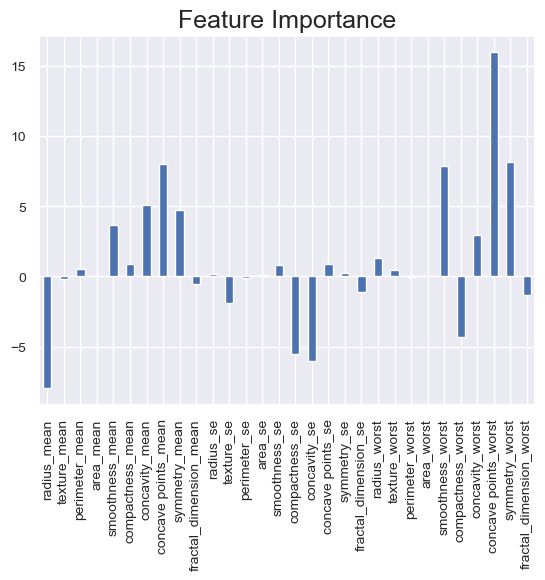

In [92]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, fontsize=10);

In [97]:
pd.crosstab(df["concave points_worst"], df["diagnosis"])

diagnosis,B,M
concave points_worst,,
0.000000,13,0
0.008772,1,0
0.009259,1,0
0.010420,1,0
0.011110,2,0
...,...,...
0.273300,0,1
0.275600,0,1
0.286700,0,1


In [98]:
df["concave points_worst"].value_counts()

concave points_worst
0.00000    13
0.05556     3
0.06296     3
0.12180     3
0.07431     3
           ..
0.15410     1
0.29030     1
0.26880     1
0.03990     1
0.26500     1
Name: count, Length: 492, dtype: int64